In [2]:
import sys
sys.executable
#!/anaconda2/bin/pip install ...
#!/anaconda2/bin/conda install ...

'/anaconda2/bin/python'

In [3]:
sys.path.append('/project/projectdirs/desi/users/burleigh/theValidator_root/repo/legacypipe/py')
sys.path

['',
 '/anaconda2/lib/python27.zip',
 '/anaconda2/lib/python2.7',
 '/anaconda2/lib/python2.7/plat-linux2',
 '/anaconda2/lib/python2.7/lib-tk',
 '/anaconda2/lib/python2.7/lib-old',
 '/anaconda2/lib/python2.7/lib-dynload',
 '/global/homes/k/kaylanb/.local/lib/python2.7/site-packages',
 '/anaconda2/lib/python2.7/site-packages',
 '/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg',
 '/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg',
 '/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/global/u2/k/kaylanb/.ipython',
 '/project/projectdirs/desi/users/burleigh/theValidator_root/repo/legacypipe/py']

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function

import matplotlib.pyplot as plt
import os
import sys
import pickle

from legacyanalysis.validation.combine_cats import get_matched_dataset
import legacyanalysis.validation.common_plots as plots

/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
!mkdir /global/homes/k/kaylanb/validation
!rsync -Larv /project/projectdirs/desi/users/burleigh/theValidator_root/pickles/validation/* validation/

mkdir: cannot create directory `/global/homes/k/kaylanb/validation': File exists
sending incremental file list

sent 97 bytes  received 13 bytes  220.00 bytes/sec
total size is 4704762  speedup is 42770.56


In [6]:
os.environ["VALIDATION_DIR"]='/global/homes/k/kaylanb/validation'
os.environ

{'LANG': 'en_US.UTF-8', 'TERM': 'xterm-color', 'SHELL': '/bin/bash', 'JPY_PARENT_PID': '39454', 'VALIDATION_DIR': '/global/homes/k/kaylanb/validation', 'CLICOLOR': '1', 'USER': 'kaylanb', 'HOME': '/global/homes/k/kaylanb', 'PATH': '/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/root/bin:/anaconda3/bin/', 'PAGER': 'cat', 'GIT_PAGER': 'cat'}

In [13]:
indir='/project/projectdirs/desi/users/burleigh/theValidator_root/input_data/bass-mosaic-decals'
decam=os.path.join(indir,'decam.txt')
bass_mzls=os.path.join(indir,'bassmos.txt')
d= get_matched_dataset(decam, bass_mzls, \
                       comparison='bmd',debug=False)

## All matched objects

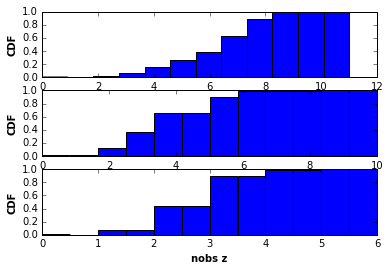

In [14]:
d.apply_cut(['all'])
plots.nobs(d.ref.data['tractor'], show=True) #outname=os.path.join(d.outdir,'radec_decals.png')

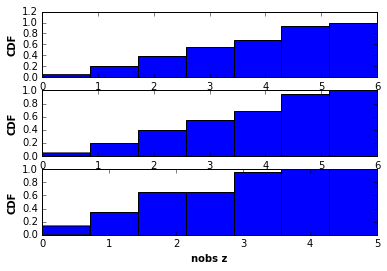

In [15]:
plots.nobs(d.test.data['tractor'], show=True)

## PSF and "clean photometry" 

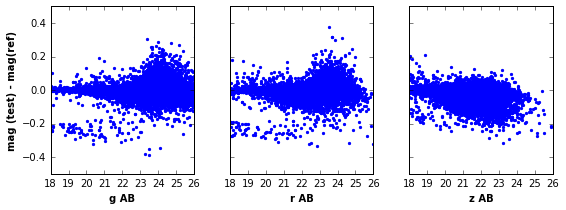

In [16]:
plots.delta_mag_vs_mag(d.ref.data['extra'],d.test.data['extra'], ylim=[-0.5,0.5],\
                       show=True)

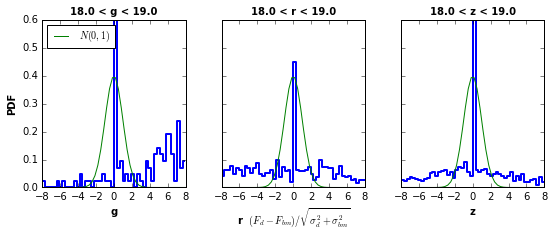

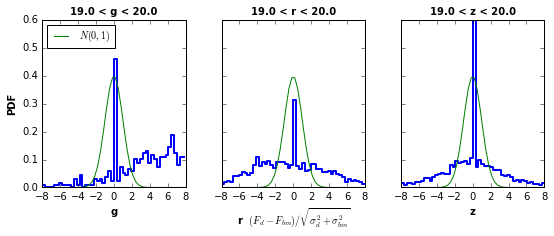

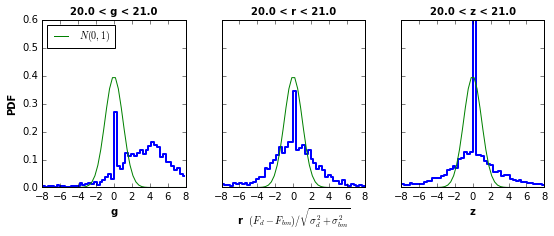

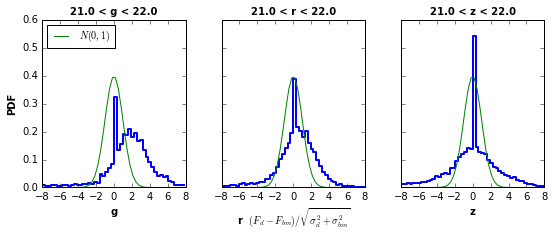

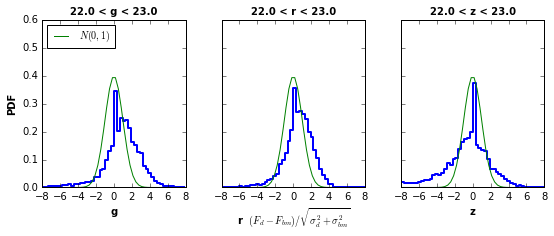

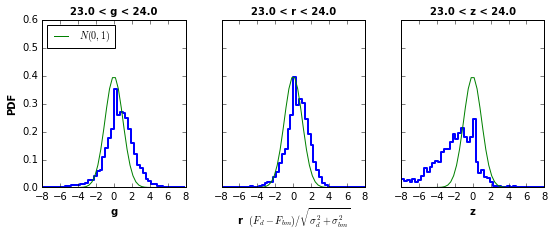

In [17]:
plots.chi_v_gaussian(d.ref.data['tractor'],d.test.data['tractor'],\
                     d.ref.data['extra'],d.test.data['extra'],\
                     low=-8.,hi=8., show=True)

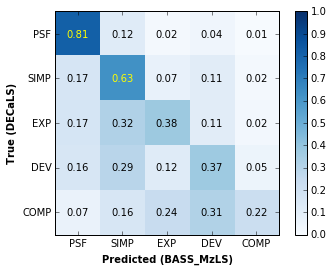

In [18]:
d.apply_cut(['clean'])
plots.confusion_matrix(d.ref.data['tractor'],d.test.data['tractor'],\
                       ref_name='DECaLS',test_name='BASS_MzLS',show=True)

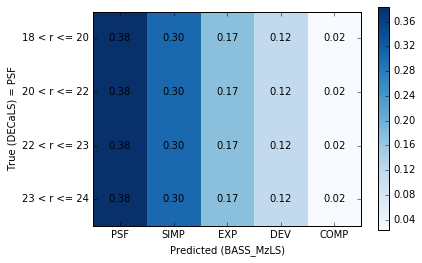

In [19]:
plots.stacked_confusion_matrix(d.ref.data['tractor'],d.test.data['tractor'],\
                               d.ref.data['extra'],d.test.data['extra'],\
                               ref_name='DECaLS',test_name='BASS_MzLS',\
                               show=True)
